### __Imports__

In [26]:
import torch
import torch.nn as nn
import scipy.stats as stats
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch import optim
import matplotlib.pyplot as plt

In [27]:
from icnnet import ICNNet
from mydataset import MyDataset, get_gaussian_dataset, get_gaussian_transport_dataset
from toy_data_dataloader_gaussian import generate_gaussian_dataset, get_dataset, generate_dataset
from train_picnn import PICNNtrain
from train_wasserstein import train_wasserstein
from train_makkuva import train_makkuva, train_makkuva_epoch
from visualization import plot_transport

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## __Generate dataset__


In [29]:
dataset = get_dataset(d=2, r=100, N=500) #valou
#dataset = generate_gaussian_dataset(d=2, r=400, N=10000) #thomas
dataset = generate_dataset(d=2, r=200, N=500)
gaussian_dataset = get_gaussian_dataset(dataset)
gaussian_transport_dataset = get_gaussian_transport_dataset(gaussian_dataset)

## __Initialization__

### __PICNN training__

In [30]:
input_size = 2
layer_sizes = [input_size, 16,64,64,64, 1]
n_layers = len(layer_sizes)

In [31]:
import torch.nn.functional as F

def get_embedding(C, c):
    scalar_product = torch.matmul(c.float(), C.t().float())
    embedding = F.softmax(scalar_product, dim=1)
    return(embedding)

context_layer_sizes = [2] * n_layers

In [32]:
model_init_f = ICNNet(layer_sizes = layer_sizes, context_layer_sizes=context_layer_sizes, init_bunne = 'TR')
model_init_g = ICNNet(layer_sizes = layer_sizes, context_layer_sizes=context_layer_sizes, init_bunne = 'TR')

In [34]:
print('training f')
gaussian_transport_dataloader = DataLoader(gaussian_transport_dataset, batch_size=250, shuffle=True)
PICNNtrain(model_init_f, gaussian_transport_dataloader, lr=0.0001, epochs=200, init_z = lambda x: (1/2) * torch.norm(x, dim=-1, keepdim=True)**2)

print('training g')
reversed_gaussian_dataset = MyDataset(gaussian_dataset.Y, gaussian_dataset.C, gaussian_dataset.X)
gaussian_transport_dataset_reversed = get_gaussian_transport_dataset(reversed_gaussian_dataset)
gaussian_transport_dataloader_reversed = DataLoader(gaussian_transport_dataset_reversed, batch_size=250, shuffle=True)
PICNNtrain(model_init_g, gaussian_transport_dataloader_reversed, lr=0.0001, epochs=200, init_z = lambda x: (1/2) * torch.norm(x, dim=-1, keepdim=True)**2)

training f
Epoch 1/200 Loss: 55.13868522644043
Epoch 2/200 Loss: 46.14567184448242
Epoch 3/200 Loss: 38.35299301147461
Epoch 4/200 Loss: 31.67832088470459
Epoch 5/200 Loss: 26.040971755981445
Epoch 6/200 Loss: 21.31317138671875
Epoch 7/200 Loss: 17.39729118347168
Epoch 8/200 Loss: 14.225083351135254
Epoch 9/200 Loss: 11.642277717590332
Epoch 10/200 Loss: 9.588215827941895
Epoch 11/200 Loss: 7.954703330993652
Epoch 12/200 Loss: 6.681268692016602
Epoch 13/200 Loss: 5.696752071380615
Epoch 14/200 Loss: 4.94905424118042
Epoch 15/200 Loss: 4.38788628578186
Epoch 16/200 Loss: 3.971593976020813
Epoch 17/200 Loss: 3.6672003269195557
Epoch 18/200 Loss: 3.446139335632324
Epoch 19/200 Loss: 3.2973941564559937
Epoch 20/200 Loss: 3.189091444015503
Epoch 21/200 Loss: 3.1172412633895874
Epoch 22/200 Loss: 3.072015404701233
Epoch 23/200 Loss: 3.0459829568862915
Epoch 24/200 Loss: 3.025627017021179
Epoch 25/200 Loss: 3.018056631088257
Epoch 26/200 Loss: 3.014228940010071
Epoch 27/200 Loss: 3.0120697021

In [35]:
state_dict_init_f = model_init_f.state_dict()
state_dict_init_g = model_init_g.state_dict()

85 1000


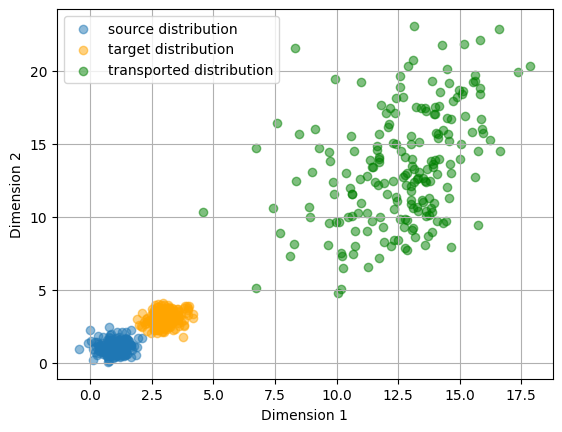

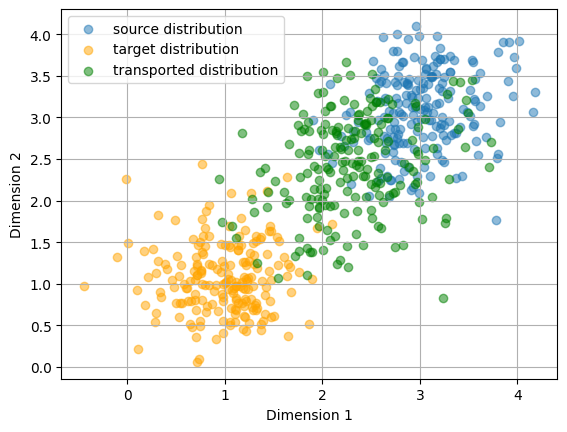

In [39]:
test=85
n_points = 1000
plot_transport(dataset, test, model_init_f, model_init_g, n_points=n_points)

In [37]:
print('training f')
gaussian_transport_dataloader = DataLoader(gaussian_transport_dataset, batch_size=250, shuffle=True)
train_wasserstein(model_init_f, gaussian_transport_dataloader, lr=0.1, epochs=10, init_z = lambda x: (1/2) * torch.norm(x, dim=-1, keepdim=True)**2)

training f
Epoch 1/10 Loss: 21660203024.949814
Epoch 2/10 Loss: 95065.8565864563
Epoch 3/10 Loss: 63.23159217834473
Epoch 4/10 Loss: 192.90418434143066
Epoch 5/10 Loss: 79.90724563598633
Epoch 6/10 Loss: 81.26347732543945
Epoch 7/10 Loss: 82.15974044799805
Epoch 8/10 Loss: 47.16038513183594
Epoch 9/10 Loss: 35.039560317993164
Epoch 10/10 Loss: 16.086443424224854


In [ ]:
# X, Y, C = gaussian_dataset.X, gaussian_dataset.Y, gaussian_dataset.C
# #Calcul de la dérivée du PICNN

# for test in range(20):
#     x_i = X[test, :, :]
#     y_i = Y[test, :, :]
#     c_i = C[test, :, :]

#     locs = c_i[:,0]
#     #print(locs)

#     scales = c_i[:,1]
#     #print(scales)  


#     y_i.requires_grad_(True)
#     x_i.requires_grad_(True)
#     #c_i.requires_grad_(True)    

#     output_model_f = model_init_f(x_i, c_i)
#     grad_model_f = torch.autograd.grad(outputs=output_model_f, inputs=x_i, grad_outputs=torch.ones_like(output_model_f), create_graph=True)[0].detach().numpy()

#     plt.hist(X[test, :, 0],  bins=15, label = 'X', density = True)
#     plt.hist(Y[test, :, 0],  bins=15, label = 'Y', density = True)
#     plt.hist(grad_model_f[:, 0],  bins=15, label = 'grad_model', density = True, alpha = 0.5)
#     # plt.hist(X_pred,  bins=15, label = 'X_pred', density = True, alpha = 0.5)
#     interval_x = np.linspace(-3, 3, 300)
#     interval_y = np.linspace(-3*scales[0] + locs[0], 3*scales[0] + locs[0], 300)

#     plt.plot(interval_x, stats.norm.pdf(interval_x, loc=0, scale=1), label = 'X_distrib', color = 'blue')
#     plt.plot(interval_y, stats.norm.pdf(interval_y, loc = locs[0], scale = scales[0]), label = 'Y_distrib', color = 'orange')

#     plt.legend()
#     plt.show()


#     output_model_g = model_init_g(y_i, c_i)
#     grad_model_g = torch.autograd.grad(outputs=output_model_g, inputs=y_i, grad_outputs=torch.ones_like(output_model_g), create_graph=True)[0].detach().numpy()
#     plt.hist(X[test, :, 0],  bins=15, label = 'X', density = True, color = 'red')
#     #plt.hist(Y[test, :, 0],  bins=15, label = 'Y', density = True, color = 'blue')
#     plt.hist(grad_model_g[:, 0],  bins=15, label = 'grad_model', density = True, alpha = 0.5)
#     # plt.hist(X_pred,  bins=15, label = 'X_pred', density = True, alpha = 0.5)
#     interval_x = np.linspace(-3, 3, 300)
#     interval_y = np.linspace(-3*scales[0] + locs[0], 3*scales[0] + locs[0], 300)

#     plt.plot(interval_x, stats.norm.pdf(interval_x, loc=0, scale=1), label = 'X_distrib', color = 'blue')
#     #plt.plot(interval_y, stats.norm.pdf(interval_y, loc = locs[0], scale = scales[0]), label = 'Y_distrib', color = 'orange')

#     plt.legend()
#     plt.show()

## __Makkuva__

In [40]:
ICNNf = ICNNet(layer_sizes = layer_sizes, context_layer_sizes=context_layer_sizes, init_bunne = 'TR')
ICNNg = ICNNet(layer_sizes = layer_sizes, context_layer_sizes=context_layer_sizes, init_bunne = 'TR')

# Load the state dictionary into ICNNf and ICNNg
ICNNf.load_state_dict(state_dict_init_f)
ICNNg.load_state_dict(state_dict_init_g)

<All keys matched successfully>

In [ ]:
#plot_transport(dataset, test, n_points, ICNNf, ICNNg)

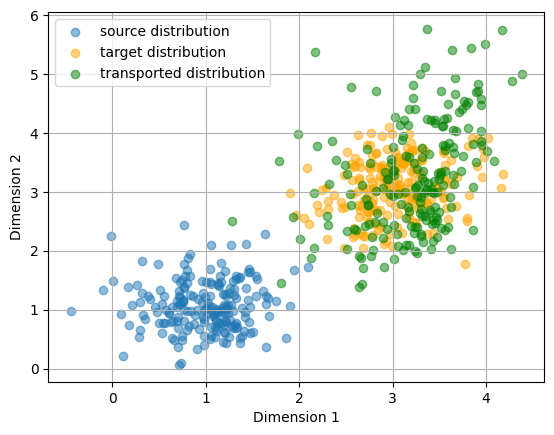

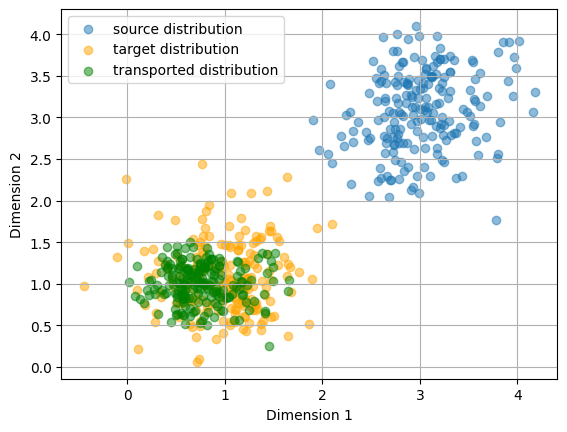

train_freq_g 10
train_freq_f 1
loss_g: 5.666642665863037, loss_f: 0.75444495677948


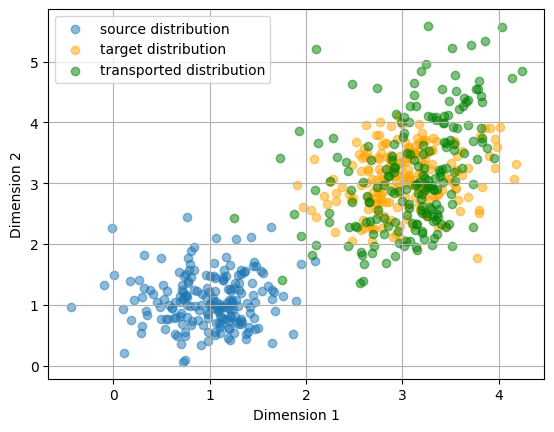

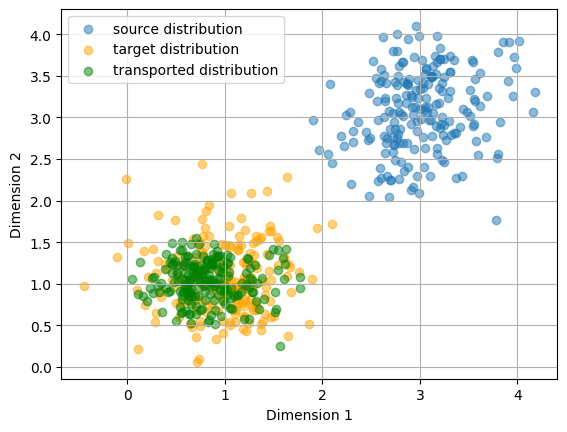

train_freq_g 10
train_freq_f 1
loss_g: 5.388479709625244, loss_f: 0.44741860032081604


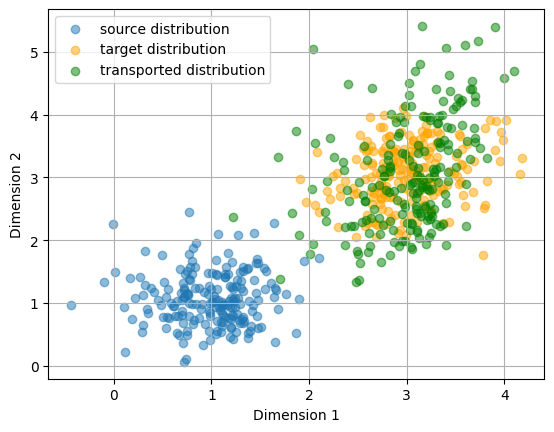

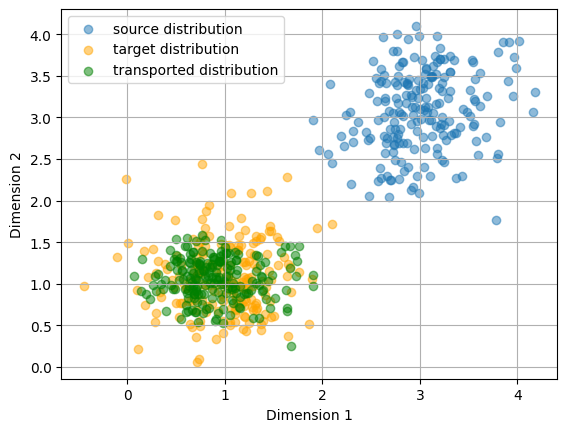

train_freq_g 10
train_freq_f 1
loss_g: 5.106584072113037, loss_f: 0.07017328590154648


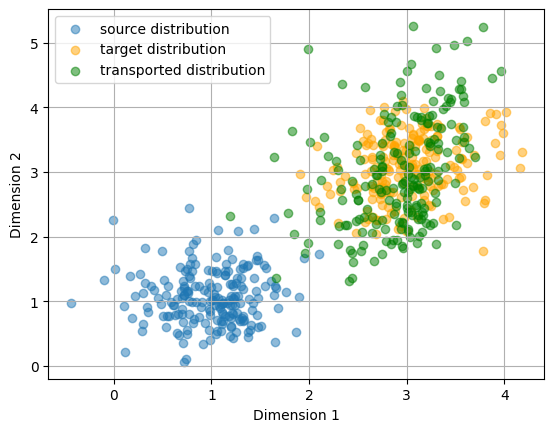

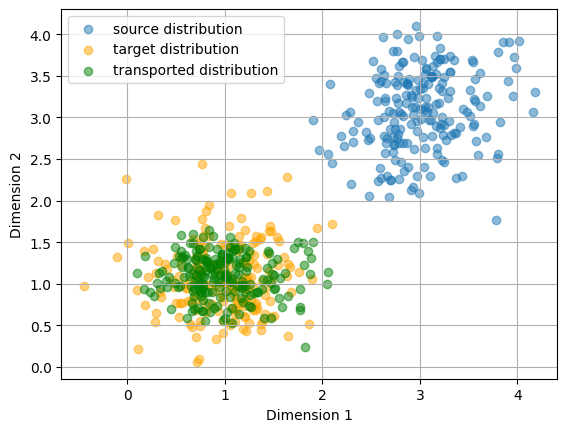

train_freq_g 10
train_freq_f 1
loss_g: 4.844323635101318, loss_f: -0.2484470158815384


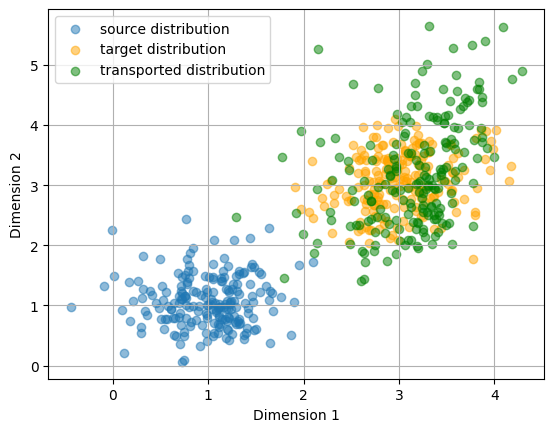

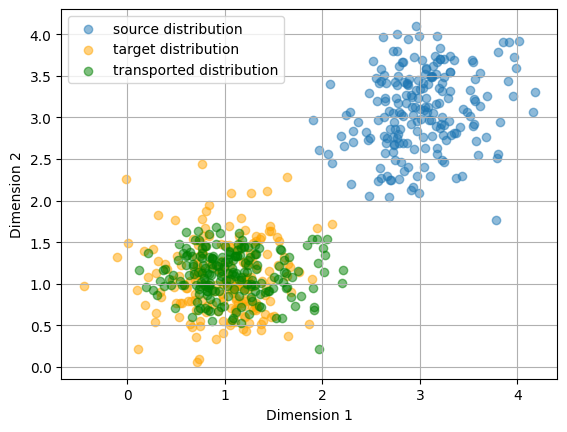

train_freq_g 10
train_freq_f 1
loss_g: 5.641905307769775, loss_f: 0.584368109703064


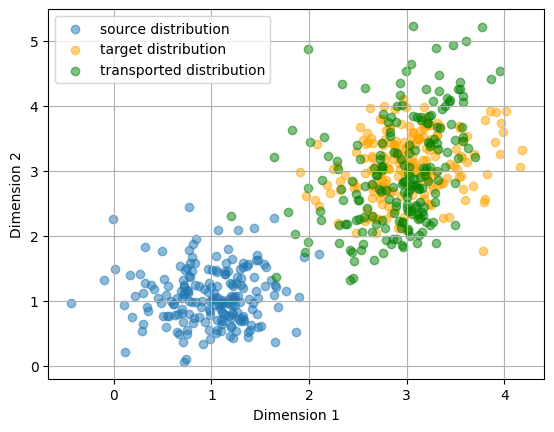

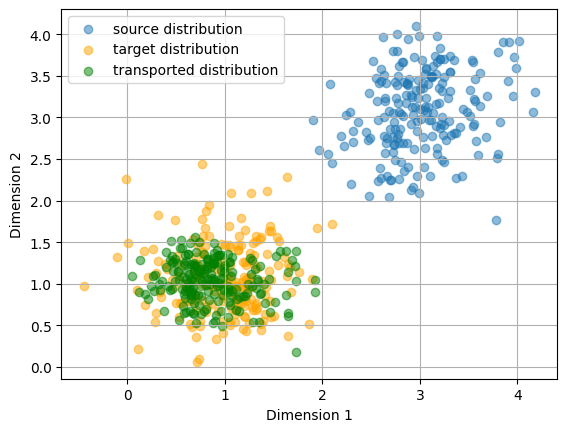

train_freq_g 10
train_freq_f 1
loss_g: 4.8513689041137695, loss_f: -0.3034821152687073


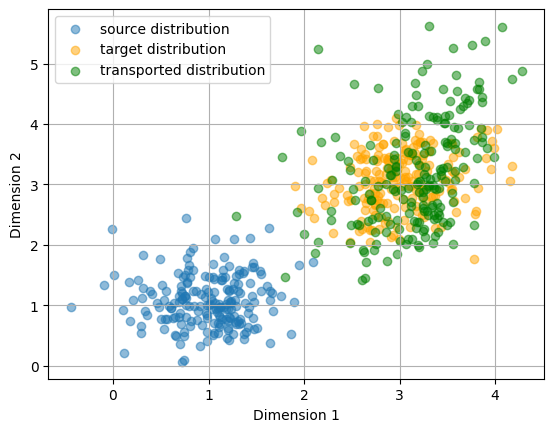

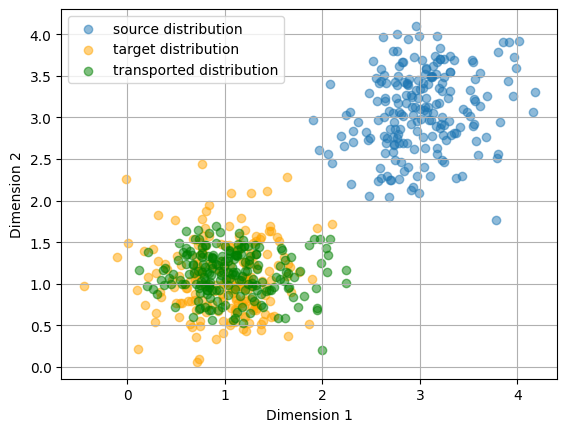

train_freq_g 10
train_freq_f 1
loss_g: 5.640244960784912, loss_f: 0.5660735368728638


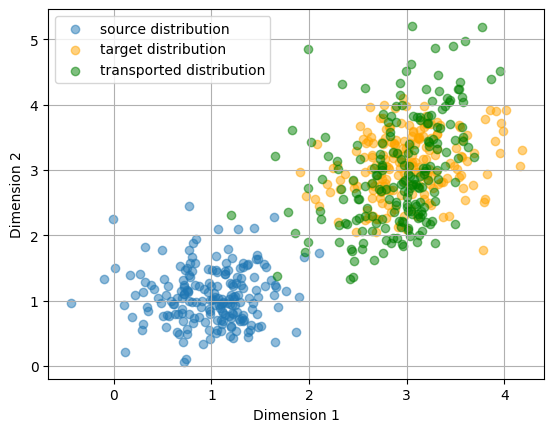

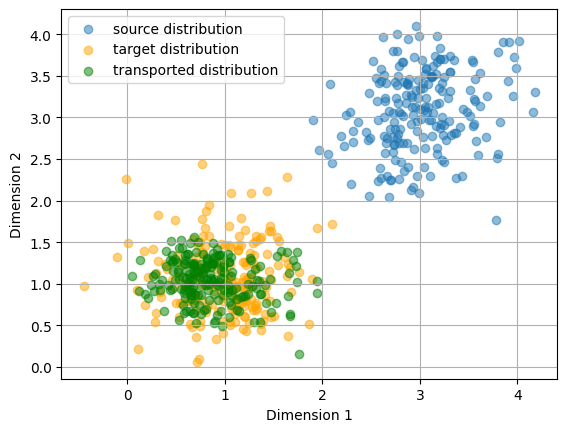

train_freq_g 10
train_freq_f 1
loss_g: 4.859256267547607, loss_f: -0.3278941512107849


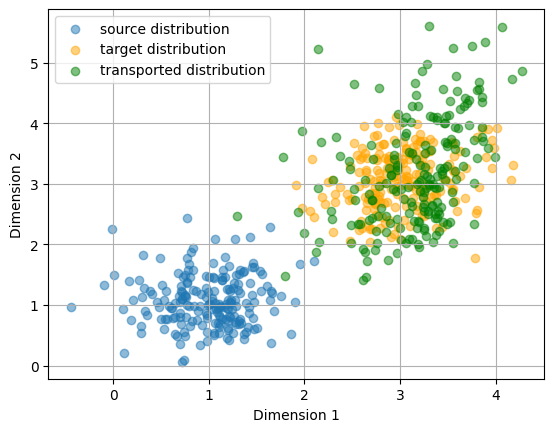

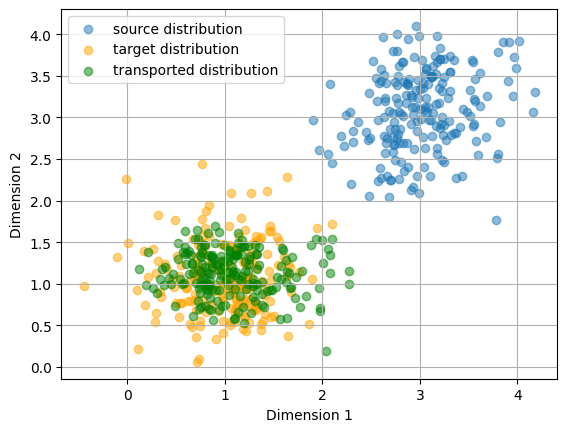

train_freq_g 10
train_freq_f 1
loss_g: 5.639683723449707, loss_f: 0.548807680606842


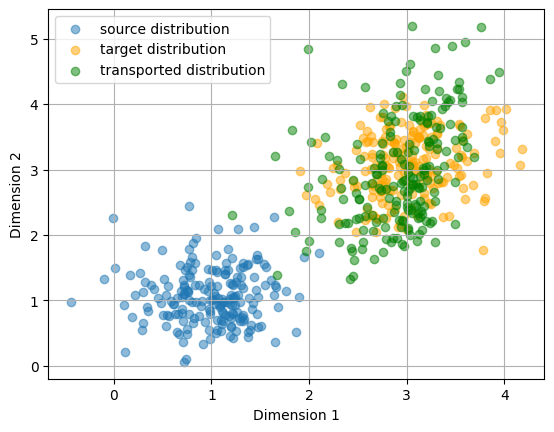

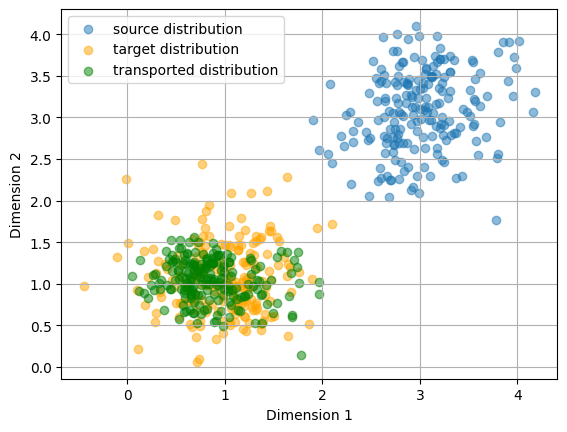

train_freq_g 10
train_freq_f 1
loss_g: 4.866649627685547, loss_f: -0.35653749108314514


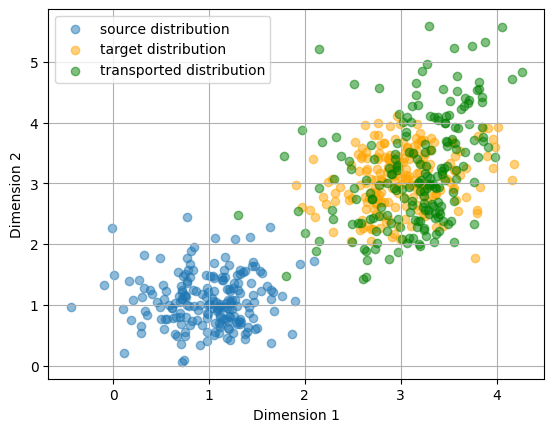

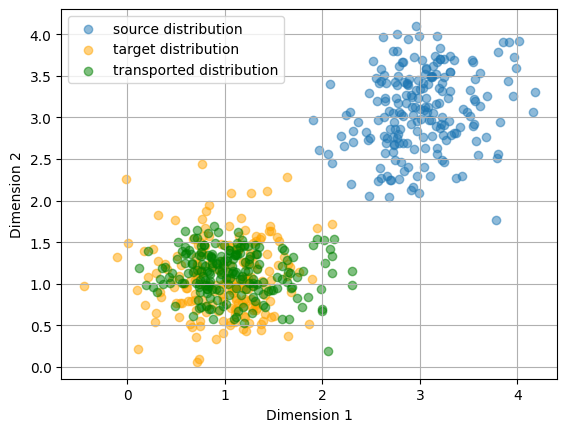

train_freq_g 10
train_freq_f 1
loss_g: 5.638115882873535, loss_f: 0.5440748929977417


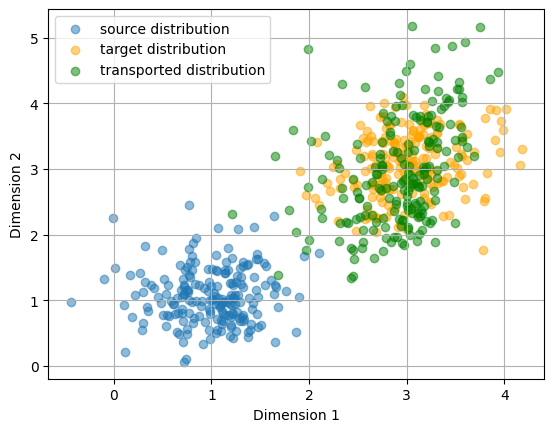

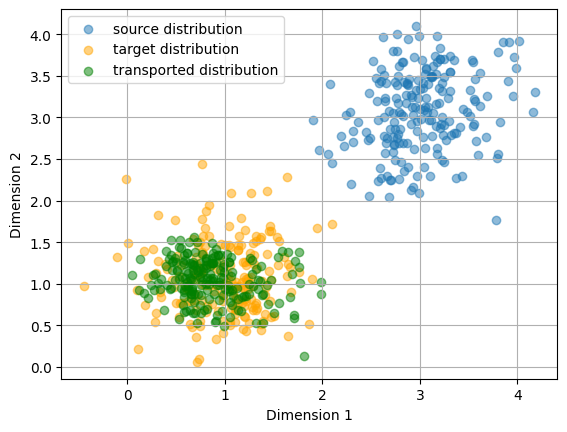

train_freq_g 10
train_freq_f 1
loss_g: 4.860509395599365, loss_f: -0.3616103529930115


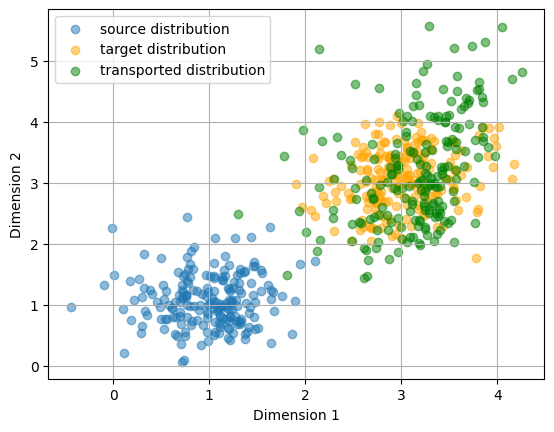

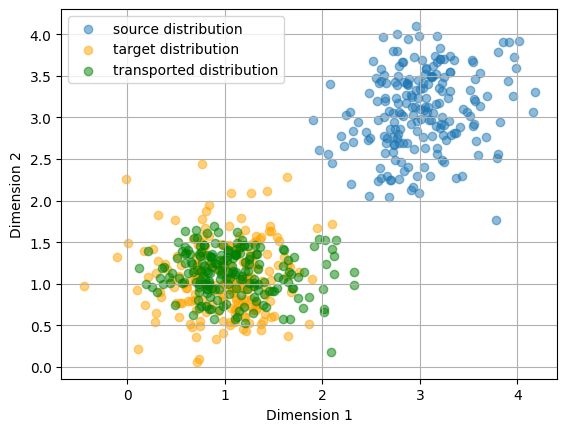

train_freq_g 10
train_freq_f 1
loss_g: 5.643391132354736, loss_f: 0.5510901212692261


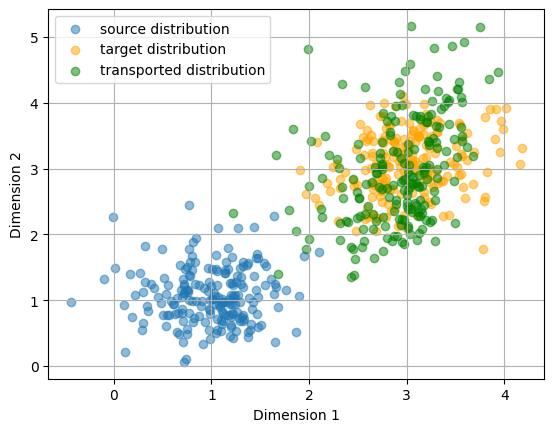

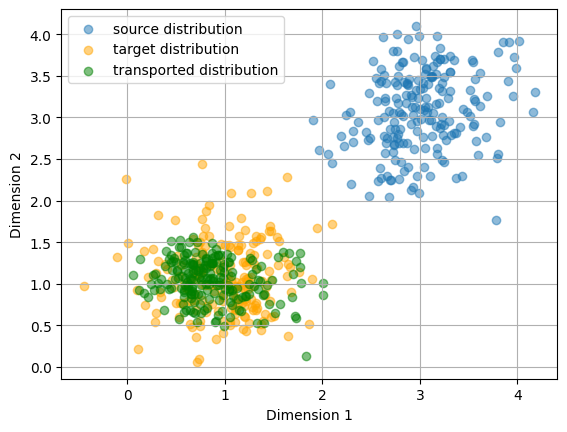

train_freq_g 10
train_freq_f 1
loss_g: 4.878663063049316, loss_f: -0.3718578815460205


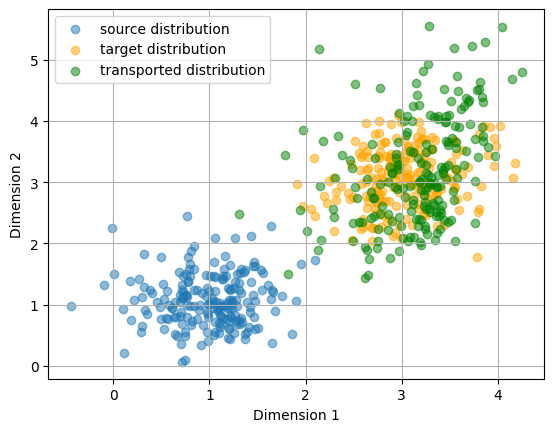

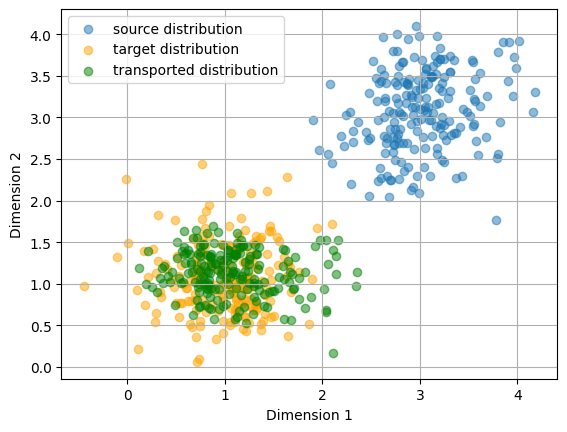

train_freq_g 10
train_freq_f 1
loss_g: 5.632071018218994, loss_f: 0.5667790174484253


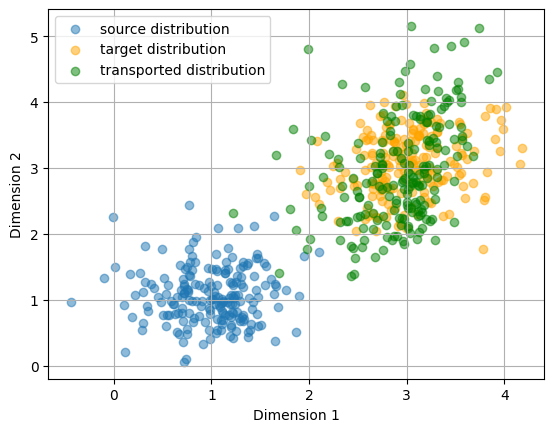

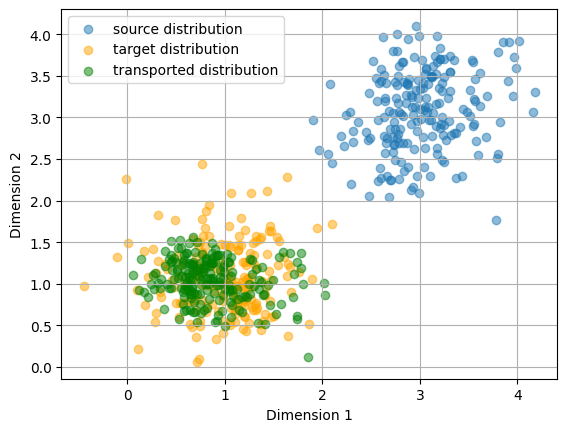

train_freq_g 10
train_freq_f 1
loss_g: 4.871007442474365, loss_f: -0.3900436460971832


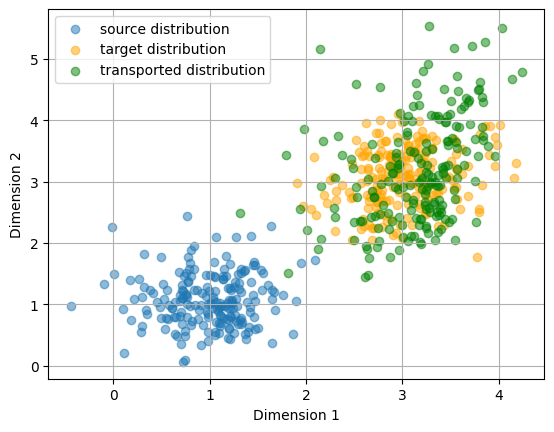

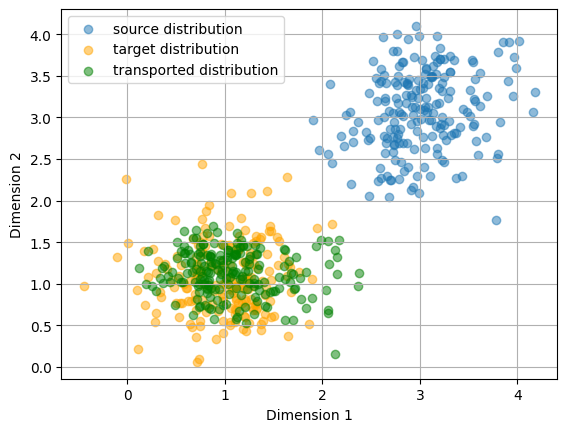

train_freq_g 10
train_freq_f 1
loss_g: 5.646309852600098, loss_f: 0.5486409664154053


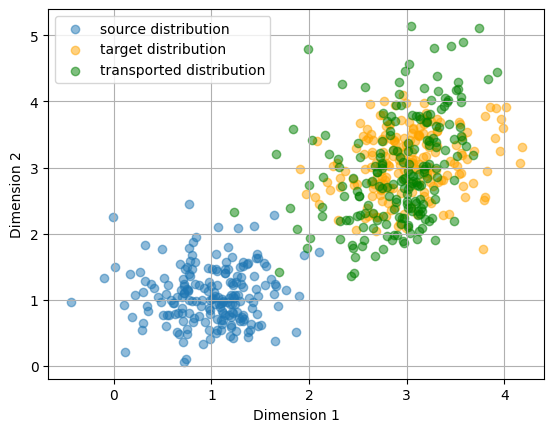

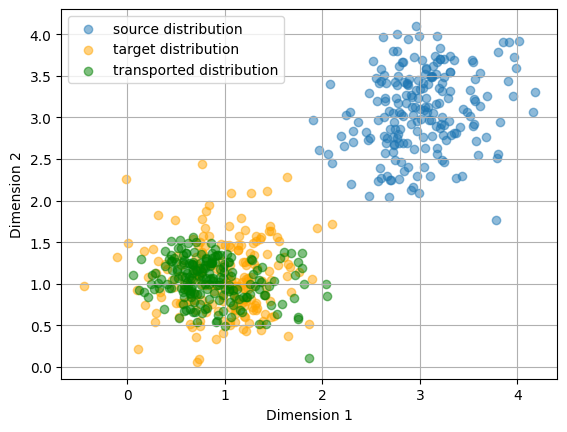

train_freq_g 10
train_freq_f 1
loss_g: 4.886696815490723, loss_f: -0.3887113332748413


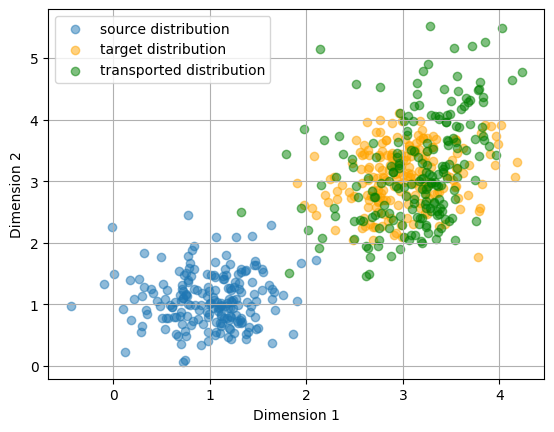

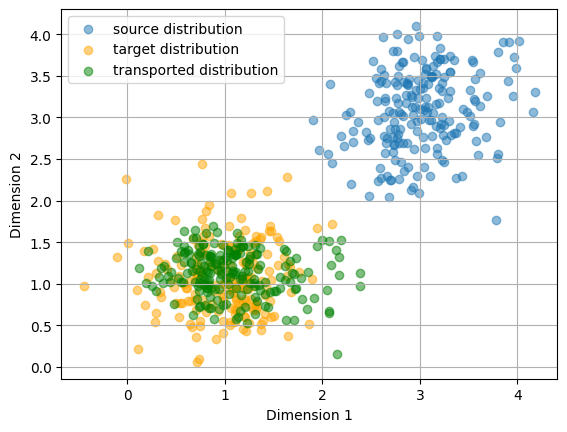

train_freq_g 10
train_freq_f 1
loss_g: 5.64841365814209, loss_f: 0.5415286421775818


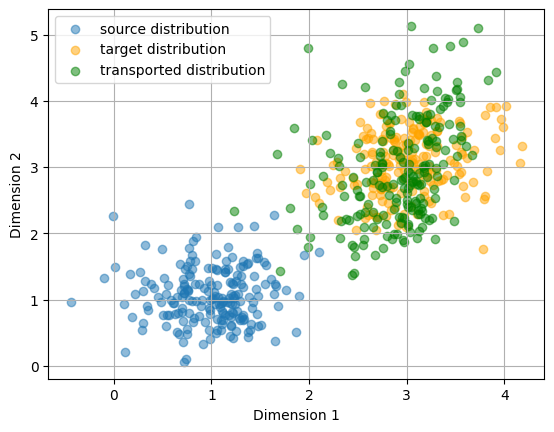

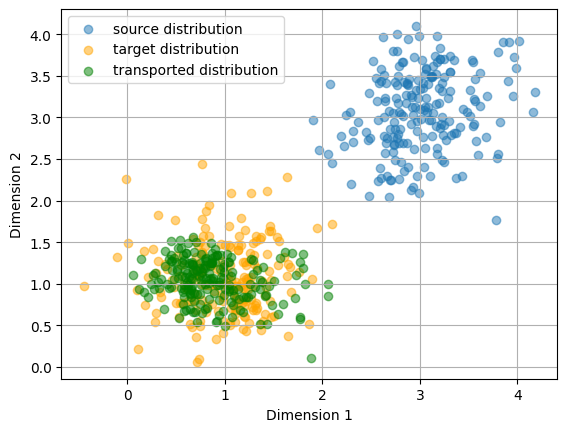

train_freq_g 10
train_freq_f 1
loss_g: 4.883993625640869, loss_f: -0.4145457446575165


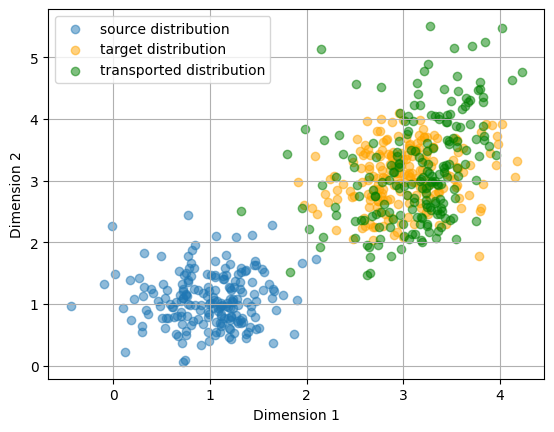

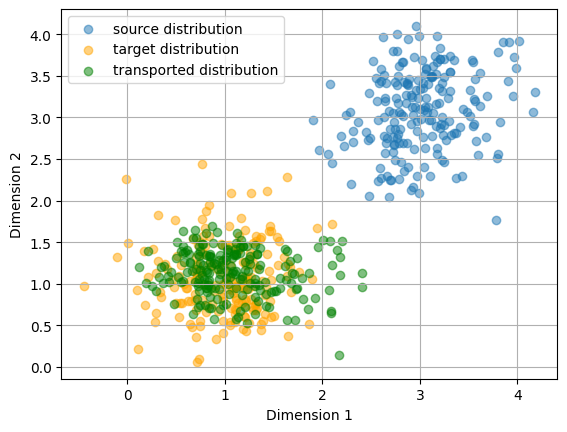

train_freq_g 10
train_freq_f 1


: 

In [42]:
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

n_points = 1000
test = 85

for epoch in range(50) :
    print('epoch :', epoch + 1, end=('\r'))
    plot_transport(dataset, test, ICNNf, ICNNg)
    train_makkuva_epoch(ICNNf, ICNNg, dataloader, init_z = lambda x: (1/2) * torch.norm(x, dim=-1, keepdim=True)**2)

In [ ]:
# filename_pth_f = 'ICNNf_TR.pth'
# filename_pth_g = 'ICNNg_TR.pth'

# torch.save(ICNNf.state_dict(), filename_pth_f)
# torch.save(ICNNg.state_dict(), filename_pth_g)